### RetinaFace is a deep learning based cutting-edge facial detector for Python coming with facial landmarks. Its detection performance is amazing even in the crowd as shown in the following illustration.

#### RetinaFace is the face detection module of insightface project. The original implementation is mainly based on mxnet. Then, its tensorflow based re-implementation is published by Stanislas Bertrand. So, this repo is heavily inspired from the study of Stanislas Bertrand. Its source code is simplified and it is transformed to pip compatible but the main structure of the reference model and its pre-trained weights are same.

#### Installation

In [6]:
! pip install retina-face

# or 

# !conda install -c conda-forge retina-face

  Using cached retina_face-0.0.17-py3-none-any.whl.metadata (10 kB)
  Using cached gdown-5.2.0-py3-none-any.whl.metadata (5.8 kB)
  Using cached tensorflow-2.13.1-cp38-cp38-win_amd64.whl.metadata (2.6 kB)
  Using cached filelock-3.16.1-py3-none-any.whl.metadata (2.9 kB)
INFO: pip is looking at multiple versions of tensorflow to determine which version is compatible with other requirements. This could take a while.
  Using cached tensorflow-2.13.0-cp38-cp38-win_amd64.whl.metadata (2.6 kB)
  Using cached tensorflow_intel-2.13.0-cp38-cp38-win_amd64.whl.metadata (4.1 kB)
  Using cached absl_py-2.3.1-py3-none-any.whl.metadata (3.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-25.9.23-py2.py3-none-any.whl.metadata (875 bytes)
  Using cached gast-0.4.0-py3-none-any.whl.metadata (1.1 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached h5py-3.11.0-cp38-cp38-win_amd64.whl.metadata (2.5 kB)
  Using cach

In [9]:
# import libraries

from retinaface import RetinaFace
import matplotlib.pyplot as plt
import cv2



## Part -I Face Detection

#### RetinaFace offers a face detection function. It expects an exact path of an image as input.

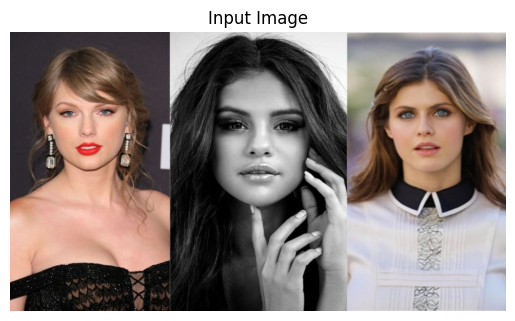

In [19]:
# define image or image path for easy to use 

img_path = "celeb_group.jpg"

# Load image using OpenCV (reads in BGR format)
img = cv2.imread(img_path)

# Convert BGR to RGB for matplotlib
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.axis('off')
plt.title('Input Image')
plt.show()

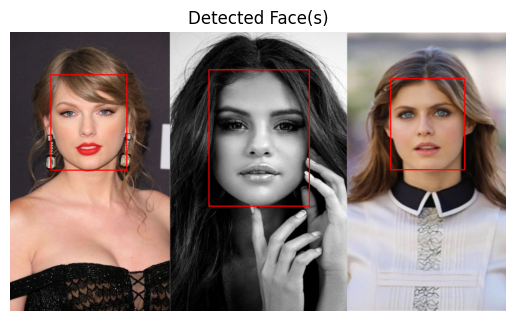

In [20]:
# use retina face 

resp = RetinaFace.detect_faces(img_path)

for key in resp:
    face = resp[key]
    facial_area = face['facial_area']  # [x1, y1, x2, y2]
    cv2.rectangle(img_rgb, (facial_area[0], facial_area[1]), (facial_area[2], facial_area[3]), (255, 0, 0), 2)

plt.imshow(img_rgb)
plt.axis('off')
plt.title('Detected Face(s)')
plt.show()

## Alignment


#####   A modern face recognition pipeline consists of 4 common stages: detect, align, normalize, represent and verify. Experiments show that alignment increases the face recognition accuracy almost 1%. Here, retinaface can find the facial landmarks including eye coordinates. In this way, it can apply alignment to detected faces with its extracting faces function.

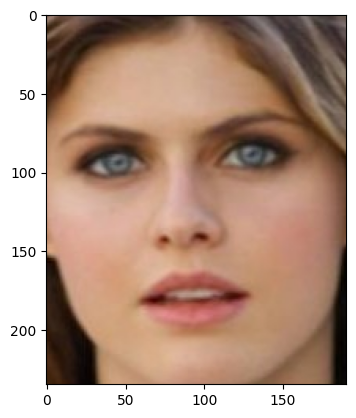

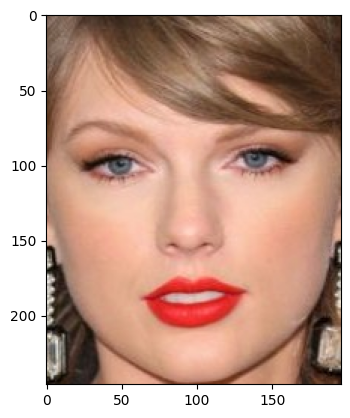

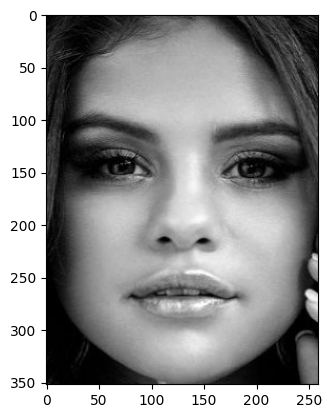

In [26]:

faces = RetinaFace.extract_faces(img_path, align = True)



for face in faces2:
  plt.imshow(face)
  plt.show()

### Face Recognition


##### Notice that face recognition module of insightface project is ArcFace, and face detection module is RetinaFace. ArcFace and RetinaFace pair is wrapped in deepface library for Python. Consider to use deepface if you need an end-to-end face recognition pipeline.

In [29]:
# install packages

!pip install deepface

  Using cached deepface-0.0.95-py3-none-any.whl.metadata (35 kB)
  Using cached fire-0.7.1-py3-none-any.whl.metadata (5.8 kB)
  Using cached gunicorn-23.0.0-py3-none-any.whl.metadata (4.4 kB)
  Using cached itsdangerous-2.2.0-py3-none-any.whl.metadata (1.9 kB)
  Using cached typing_extensions-4.5.0-py3-none-any.whl.metadata (8.5 kB)
Using cached deepface-0.0.95-py3-none-any.whl (128 kB)
Using cached fire-0.7.1-py3-none-any.whl (115 kB)
Using cached gunicorn-23.0.0-py3-none-any.whl (85 kB)
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   ---- ----------------------------------- 0.3/2.3 MB ? eta -:--:--
   ------------------ --------------------- 1.0/2.3 MB 2.5 MB/s eta 0:00:01
   --------------------------- ------------ 1.6/2.3 MB 2.5 MB/s eta 0:00:01
   --------------------------- ------------ 1.6/2.3 MB 2.5 MB/s eta 0:00:01
   ------------------------------------- -- 2.1/2.3 MB 2.1 MB/s eta 0:00:01
   ---------------------------------------- 2.3/2.3 MB 2.1 MB/s 

Verified: True
Distance: 0.130071
Threshold: 0.68
Model: ArcFace


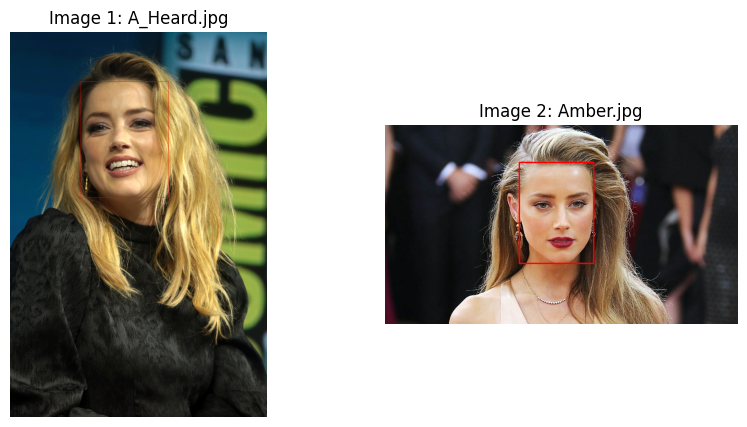

In [36]:
from deepface import DeepFace
from retinaface import RetinaFace        
import cv2                               
import matplotlib.pyplot as plt  


img1_path = "A_Heard.jpg"
img2_path = "Amber.jpg"

obj = DeepFace.verify(
    img1_path,
    img2_path,
    model_name='ArcFace',
    detector_backend='retinaface'
)

print("Verified:", obj["verified"])
print("Distance:", obj["distance"])
print("Threshold:", obj["threshold"])
print("Model:", obj["model"])

# Load images using OpenCV (BGR format)
img1 = cv2.imread(img1_path)
img2 = cv2.imread(img2_path)

# Convert to RGB for matplotlib
img1_rgb = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2_rgb = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

# Detect faces and draw bounding boxes for img1
resp1 = RetinaFace.detect_faces(img1_path)
for key in resp1:
    face = resp1[key]
    x1, y1, x2, y2 = face['facial_area']
    cv2.rectangle(img1_rgb, (x1, y1), (x2, y2), (255,0,0), 2)

# Detect faces and draw bounding boxes for img2
resp2 = RetinaFace.detect_faces(img2_path)
for key in resp2:
    face = resp2[key]
    x1, y1, x2, y2 = face['facial_area']
    cv2.rectangle(img2_rgb, (x1, y1), (x2, y2), (255,0,0), 2)

# Display images side by side
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
plt.imshow(img1_rgb)
plt.title("Image 1: A_Heard.jpg")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(img2_rgb)
plt.title("Image 2: Amber.jpg")
plt.axis('off')

plt.show()
